In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder

In [4]:
df = pd.read_csv('../datasets/katie-animals_w_outcome.csv')

In [5]:
df.head()

,animal_type,color,breed,intake_type,outcome_type,intake_condition,month_in,day_in,prev_adoption,prev_transfer,...,prev_rto_adopt,prev_disposal,prev_missing,age_upon_intake,is_named_in,mix,sex,is_neutered,days_in_shelter,age_type
0,Dog,yellow white,spinone italiano mix,Public Assist,Return to Owner,Normal,12,Friday,0,0,...,0,0,0,7.0,1,1,Male,Neutered/Spayed,1,6 Years-10 Years
1,Dog,yellow white,spinone italiano mix,Public Assist,Return to Owner,Normal,3,Friday,0,0,...,0,0,0,6.0,1,1,Male,Neutered/Spayed,1,2 Years-6 Years
2,Dog,tricolor,dachshund,Owner Surrender,Transfer,Normal,4,Wednesday,0,0,...,0,0,0,1.0,1,0,Male,Neutered/Spayed,4,6 Months-2 Years
3,Dog,brown white,sheepdog shetland,Public Assist,Return to Owner,Injured,11,Saturday,0,0,...,0,0,0,1.0,1,0,Male,Neutered/Spayed,0,6 Months-2 Years
4,Dog,white black,retriever labrador bull pit,Stray,Return to Owner,Aged,11,Saturday,0,0,...,0,0,0,1.0,1,0,Female,Neutered/Spayed,0,6 Months-2 Years


In [10]:
df.select_dtypes('object').columns

Index(['animal_type', 'color', 'breed', 'intake_type', 'outcome_type',
       'intake_condition', 'day_in', 'sex', 'is_neutered', 'age_type'],
      dtype='object')

In [75]:
df['month_in'] = df['month_in'].astype(str)

In [76]:
len(df['animal_type'].value_counts())

5

In [113]:
df['animal_type'].

AttributeError: 'Series' object has no attribute 'unique_values'

In [115]:
def initial_eda(df):
    # List of categorical columns
    cat_cols = df.select_dtypes('object').columns
    
    for col in cat_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
        
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12: 
            plt.figure(figsize = (8, 6))        
            sns.countplot(x=df[col], 
                          data=df, 
                          palette="Paired",
                          order = df[col].value_counts().index)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        else:
            print(f'{column_name} has {len(df[col].value_counts())} unique values. Alternative EDA should be considered.')
    return

In [114]:
def initial_eda(df):
    # List of categorical columns
    cat_cols = df.select_dtypes('object').columns
    
    for col in cat_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
        
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12: 
            plt.figure(figsize = (8, 6))        
            sns.countplot(x=df[col], 
                          data=df, 
                          palette="Paired",
                          order = df[col].value_counts().index)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20) # Playing it safe in case of overlapping
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        else:
            print(f'{column_name} has {len(df[col].value_counts())} unique values. Alternative EDA should be considered.')
    return

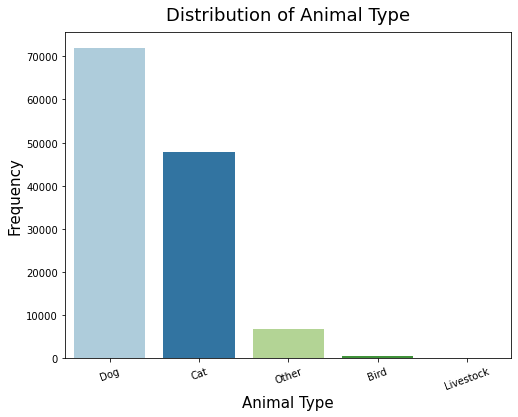

Color has 373 unique values. Alternative EDA should be considered.
Breed has 2108 unique values. Alternative EDA should be considered.


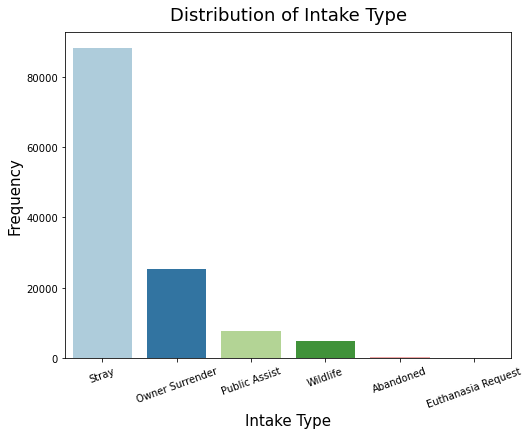

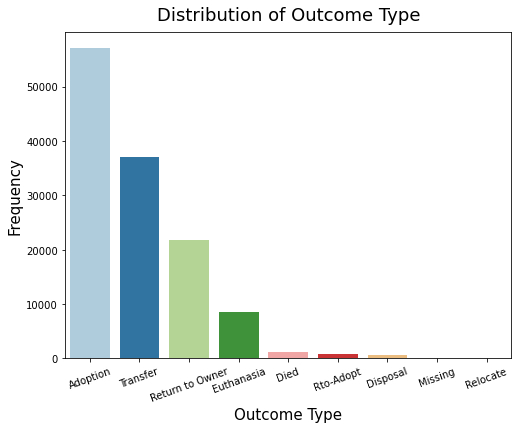

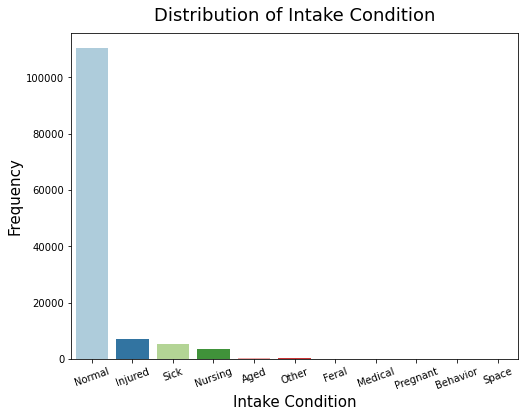

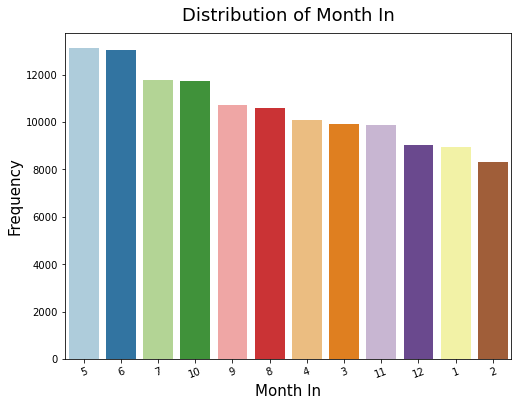

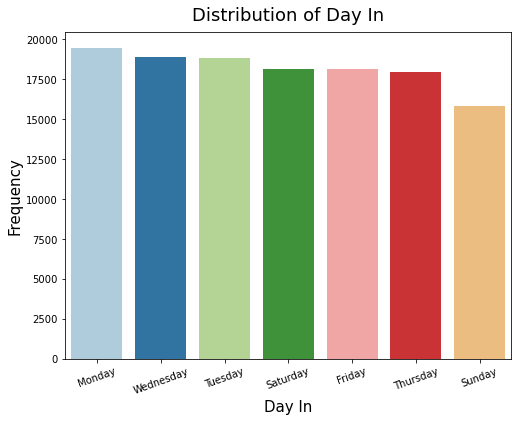

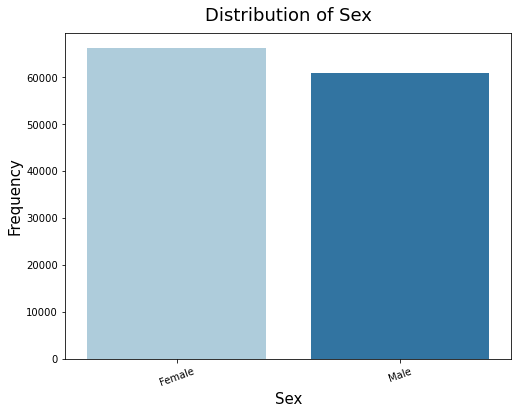

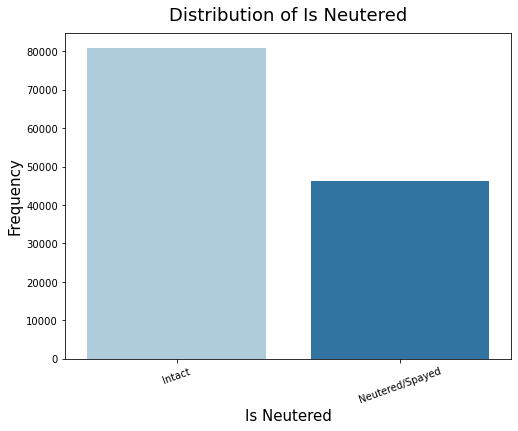

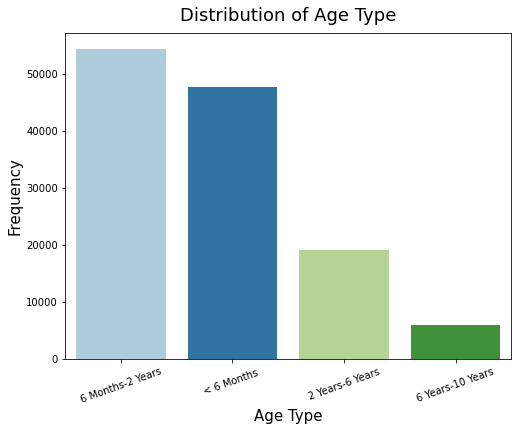

In [112]:
initial_eda(df)

In [33]:
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
    column_name = col.title().replace('_', ' ')
    title= ' Distribution of ' + column_name
    print(title)

 Distribution of Animal Type
 Distribution of Color
 Distribution of Breed
 Distribution of Intake Type
 Distribution of Outcome Type
 Distribution of Intake Condition
 Distribution of Day In
 Distribution of Sex
 Distribution of Is Neutered
 Distribution of Age Type
